<a href="https://colab.research.google.com/github/fun-math/iarc_ml/blob/main/iarc_box_large.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import random
import os

drive.mount('/content/drive')

Mounted at /content/drive


#Initial Preparation

In [ ]:
%cd '/content/drive/My Drive/yolov3/darknet'

/content/drive/My Drive/yolov3/darknet


In [ ]:
!chmod 755 darknet 

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  if isinstance(path,str):
    image = cv2.imread(path)
  else :
    image=path
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

#Train

In [ ]:
def change_batch(cfg_file):
  %cd cfg
  !sed -i 's/batch=1/batch=64/' {cfg_file}
  !sed -i 's/subdivisions=1/subdivisions=16/' {cfg_file}
  %cd ..

def train(data,cfg,wts):
  # train your custom detector
  !./darknet detector train {data} {cfg} {wts} -dont_show
  imShow('chart.png')

## Yolov3

In [ ]:
# need to set our custom cfg to trait mode 
%cd cfg
!sed -i 's/batch=1/batch=64/' yolov3_box.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov3_box.cfg
%cd ..


In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_box.cfg darknet53.conv.74 -dont_show

In [ ]:
imShow('chart.png')

### box

In [ ]:
train('data/obj.data',
      'yolov3_box.cfg',
      'darknet53.conv.74')

### module

In [ ]:
train('data/obj_module.data',
      'cfg/yolov3_module.cfg',
      'darknet53.conv.74')

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.887221, GIOU: 0.884642), Class: 0.999901, Obj: 0.714955, No Obj: 0.001277, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.180633, iou_loss = 0.006596, total_loss = 0.187229 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.861056, GIOU: 0.858988), Class: 0.999847, Obj: 0.658910, No Obj: 0.000560, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.235784, iou_loss = 0.011989, total_loss = 0.247773 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.557322, GIOU: 0.496310), Class: 0.984381, Obj: 0.006990, No Obj: 0.000016, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.248200, iou_loss = 0.166917, total_loss = 0.415117 
 total_bbox = 146979, rewritten_bbox = 0.000000 % 

 2757: 0.203510, 0.192523 avg loss, 0.001000 rate, 1.793759 seconds, 176448 images, 0.670317 hours left
Loaded: 0.000034 seconds
v3 (m

## Yolov4

In [ ]:
with open('data/obj_module/default_default_front_cam(1)-1518.txt','r') as f:
  lines=f.readlines()
  print(lines)

['1\n', '217 181 321 290\n']


In [ ]:
# need to set our custom cfg to trait mode 
%cd cfg
!sed -i 's/batch=1/batch=64/' yolov4_box.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov4_box.cfg
%cd ..


In [ ]:
# YOLOv4
!./darknet detector train data/obj.data cfg/yolov4_box.cfg yolov4.conv.137 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.778486, GIOU: 0.777243), Class: 0.996360, Obj: 0.676161, No Obj: 0.004446, .5R: 1.000000, .75R: 0.666667, count: 6, class_loss = 1.067953, iou_loss = 0.527670, total_loss = 1.595623 
 total_bbox = 373396, rewritten_bbox = 0.000536 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.616233, GIOU: 0.599981), Class: 0.983931, Obj: 0.290050, No Obj: 0.000169, .5R: 0.857143, .75R: 0.142857, count: 7, class_loss = 1.319231, iou_loss = 14.321571, total_loss = 15.640802 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.748219, GIOU: 0.742215), Class: 0.996008, Obj: 0.674061, No Obj: 0.002021, .5R: 1.000000, .75R: 0.538462, count: 13, class_loss = 0.898638, iou_loss = 3.718684, total_loss = 4.617321 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.782959, GIOU: 0.780260), Class: 0.998824, Obj: 0.581008, N

In [ ]:
# YOLOv4
!./darknet detector train data/obj.data cfg/yolov4_box.cfg backup/yolov4_box_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 205766, rewritten_bbox = 0.000000 % 

 3926: 0.347106, 0.204271 avg loss, 0.000010 rate, 8.204086 seconds, 251264 images, 0.262080 hours left
Loaded: 0.000068 seconds
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.939242, GIOU: 0.939136), Class: 0.999106, Obj: 0.910483, No Obj: 0.000653, .5R: 1.000000, .75R: 1.000000, count: 5, class_loss = 0.025192, iou_loss = 3.207521, total_loss = 3.232713 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.920613, GIOU: 0.920555), Class: 0.999513, Obj: 0.918549, No Obj: 0.002578, .5R: 1.000000, .75R: 1.000000, count: 6, class_loss = 0.029091, iou_loss = 1.212123, total_loss = 1.241214 
 to

In [ ]:
imShow('chart.png')

### box

In [ ]:
train('data/obj.data',
      'yolov4_box.cfg',
      'yolov4.conv.137')

### module

In [26]:
train('data/obj_module.data',
      'cfg/yolov4_module_new.cfg',
      'yolov4.conv.137')

Streaming output truncated to the last 5000 lines.
 total_bbox = 893513, rewritten_bbox = 0.000560 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.810956, GIOU: 0.806900), Class: 0.995711, Obj: 0.231934, No Obj: 0.000031, .5R: 1.000000, .75R: 1.000000, count: 3, class_loss = 0.616957, iou_loss = 9.197375, total_loss = 9.814332 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.784952, GIOU: 0.780369), Class: 0.998016, Obj: 0.525043, No Obj: 0.000817, .5R: 1.000000, .75R: 0.750000, count: 16, class_loss = 1.671020, iou_loss = 9.247767, total_loss = 10.918788 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.885475, GIOU: 0.883670), Class: 0.997738, Obj: 0.764972, No Obj: 0.002718, .5R: 1.000000, .75R: 0.875000, count: 16, class_loss = 0.522068, iou_loss = 2.410791, total_loss = 2.932859 
 total_bbox = 893548, rewritten_bbox = 0.000560 % 

 2261: 0.512588, 0.876196 avg loss, 0.001000 rate, 8.292890 seconds, 144704 im

#Test

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_box.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_box.cfg
%cd ..


## Get bbox

In [ ]:
def test1(cfg,wts,path):
  # run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
  !./darknet detector test data/obj.data {cfg} {wts} '{path}' -dont_show -ext_output
  imShow('predictions.jpg')

def testmany(cfg,wts,path,out):
  # run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
  !./darknet detector test data/obj.data {cfg} {wts} -dont_show -ext_output < {path} > {out}

In [ ]:
test1('cfg/yolov3_box.cfg',
      'backup/yolov3_box_last.weights',
      'data/obj/Odefault_quadrotor_base_link_front_cam_camera_sensor(1)-0274.jpg'
      'result.txt')

In [ ]:
testmany('cfg/yolov3_box.cfg',
      'backup/yolov3_box_last.weights',
      'data/train.txt')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 128 x 128 x 128 0.002 BF
   9 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x

## Measure AP on a set of images

In [ ]:
def ap(cfg,wts,path,iou_thresh):
  #AP
  !./darknet detector map data/obj.data {cfg} {wts} -iou_thresh {iou_thresh} -dont_show -ext_output < {path}

In [ ]:
ap('cfg/yolov4_box.cfg',
   'backup/yolov4_box_3000.weights',
   'data/valid_box.txt',
   0.9)

## Test on a video

In [ ]:
def video(cfg,wts,path,out):
  !./darknet detector demo data/obj.data {cfg} {wts} -dont_show -ext_output {path} -i 0 -out_filename {out} > video_result.txt

In [ ]:
video('cfg/yolov4_box.cfg',
   'backup/yolov4_box_4000.weights',
   'my_camera.mp4',
   'my_camera_v4.avi')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   3 route  1 		                           ->  256 x 256 x  64 
   4 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   5 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   6 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   8 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   9 route  8 2 	                           ->  256 x 256 x 128 
  10 conv   

### Pipeline to second model

In [ ]:
!mkdir video

In [ ]:
cap=cv2.VideoCapture('my_camera.mp4')

i=0
while True:
  ret,frame=cap.read()
  if not ret :
    break
  cv2.imwrite(f'video/{i}.jpg',frame)
  i+=1

In [ ]:
!mkdir data/video

In [ ]:
!mv video/* data/video/

In [ ]:
!python3 generate_train.py video video.txt

In [ ]:
testmany('cfg/yolov4_box.cfg',
      'backup/yolov4_box_4000.weights',
      'data/video.txt',
      'result_video.txt')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   3 route  1 		                           ->  256 x 256 x  64 
   4 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   5 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   6 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   8 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   9 route  8 2 	                           ->  256 x 256 x 128 
  10 conv     64       1

In [ ]:
!mkdir data/video_cropped

In [ ]:
help(type(cv2.VideoWriter))

In [ ]:
fourcc=cv2.VideoWriter_fourcc(*'DIVX')
result = cv2.VideoWriter('my_camera_cropped.mp4',fourcc,30,(320,320))

In [ ]:
with open('result_video.txt','r') as f:
  lines=f.readlines()
  print(len(lines))

20396


In [ ]:
result.release()

In [ ]:
with open('result_video.txt','r') as f:
  lines=f.readlines()
  i=7
  k=0
  m=0
  l=0
  s=0
  while True :
    path=lines[i+3].split(':')[0]
    # with open(path[:-3]+'txt','r') as g:
    #   gt=g.readlines()
    img=cv2.imread(path)
    # print(path)
    h0,w0,c=img.shape
    box='\n'
    if lines[i+4][:3]=='box':
      box=lines[i+4]
      j=i+5
      while j<len(lines):
        if lines[j][:5]=='Enter':
          break
        else :
          j+=1
      i=j
      m+=1
      # if len(gt)>0 : 
      #   m+=1
      words=box.split()
      x=int(words[3])
      y=int(words[5])
      w=int(words[7])
      h=int(words[9][:-1])
      mod_img=img[int(max(y,0)):int(min(y+h,h0)),int(max(x,0)):int(min(x+w,w0))]
      #print(x,y,w,h)
      mod_img=cv2.resize(mod_img,(320,320))
      result.write(mod_img)
      # if w*h < 2500 or (min(x+w,w0)-max(x,0))*(min(y+h,h0)-max(y,0)) < 2500 :
      #   cv2.imwrite('data/module_train/small/'+path[9:],mod_img)
      #   s+=1
      # elif w*h < 10000 or (min(x+w,w0)-max(x,0))*(min(y+h,h0)-max(y,0)) < 10000 :
      #   cv2.imwrite('data/module_train/medium/'+path[9:],mod_img)
      #   m+=1
      # else :
      #   cv2.imwrite('data/module_train/large/'+path[9:],mod_img)
      #   l+=1
    else :
      i+=4
      result.write(img)
      # if len(gt)==0:
      #   m+=1
    #print(path,"\n",box,"\n")
    k+=1
    if i+3>=len(lines) :
      break
    print(i)
print(k,m)



11
15
19
23
27
31
35
39
43
47
51
55
59
63
67
71
75
79
83
87
91
95
99
103
107
111
115
119
123
127
131
135
139
143
147
151
155
159
163
167
171
175
179
183
187
191
195
199
203
207
211
215
219
223
227
231
235
239
243
247
251
255
259
263
267
271
275
279
283
287
291
295
299
303
307
311
315
319
323
327
331
335
339
343
347
351
355
359
363
367
371
375
379
383
387
391
395
399
403
407
411
415
419
423
427
431
435
439
443
447
451
455
459
463
467
471
475
479
483
487
491
495
499
503
507
511
515
519
523
527
531
535
539
543
547
551
555
559
563
567
571
575
579
583
587
591
595
599
603
607
611
615
619
623
627
631
635
639
643
647
651
655
659
663
667
671
675
679
683
687
691
695
699
703
707
711
715
719
723
727
731
735
739
743
747
751
755
759
763
767
771
775
779
783
787
791
795
799
803
807
811
815
819
823
827
831
835
839
843
847
851
855
859
863
867
871
875
879
883
887
891
895
899
903
907
911
915
919
923
927
931
935
939
943
947
951
955
959
963
967
971
975
979
983
987
991
995
999
1003
1007
1011
1015
1019
1023
1

In [ ]:
video('cfg/yolov4_module.cfg',
      'backup/yolov4_module_4000.weights',
      'my_camera_cropped.mp4',
      'my_camera_cropped_v4.avi')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   9 route  8 2 	                           ->  160 x 160 x 128 
  10 conv   

In [ ]:
!python generate_train.py video_cropped video_cropped.txt

In [ ]:
testmany('cfg/yolov3_module.cfg',
      'backup/yolov3_module_4000.weights',
      'data/video_cropped.txt',
      'result_video_cropped.txt')

In [ ]:
!mkdir model_data

In [ ]:
!touch convert.py 

In [ ]:
!ls | grep conver

convert.py


In [ ]:
!python3 convert.py cfg/yolov3_module.cfg backup/yolov3_module_4000.weights model_data/module.h5

2020-12-20 06:50:16.953895: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Loading weights.
Weights Header:  0 2 5 [256000]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
2020-12-20 06:50:20.147882: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-20 06:50:20.149108: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-20 06:50:20.205120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-20 06:50:20.206381: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCap

In [ ]:
model=tf.keras.models.load_model('model_data/module.h5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Moving files

In [ ]:
%cd dataset3

/content/drive/My Drive/dataset3


In [ ]:
!unzip 0L.zip

In [ ]:
!ls

0  0L  0L.zip  1  1L  2  2L  3	3L  4  4L


In [ ]:
!mv 001s 0L

In [ ]:
%cd data/

/content/drive/My Drive/yolov3/darknet/data


In [ ]:
!mkdir obj_module_new

In [ ]:
%cd ..

/content/drive/MyDrive/yolov3/darknet


In [ ]:
src_dir='../../dataset3/'
dest='data/obj_module_new/'

In [ ]:
for i in range(5) :
  # if i==9 or i==10 :
  #   continue
  src=src_dir+f'{i}/.'
  !cp -a {src} {dest}
  src=src_dir+f'{i}L/.'
  !cp -a {src} {dest}
  print(i)

0
1
2
3
4


In [ ]:
!python3 generate_train.py obj_module_new train_module_new.txt

In [ ]:
!cp cfg/yolov4_module.cfg cfg/yolov4_module_new.cfg

In [ ]:
!ls data/obj_module_new/ | grep txt | wc -l

1080


In [ ]:
%cd '/content/drive/My Drive/'

/content/drive/My Drive


In [ ]:
src_dir='train/'
!ls {src_dir}

10  20	30  40	5  50


In [ ]:
dirs=['5','10','20','30','40','50']

In [ ]:
for i in range(5):
  !rm -r dataset3/{i}
  !mkdir -p dataset3/{i}

In [ ]:
dest_dir='dataset3/'
!ls {dest_dir}

In [ ]:
for i in range(6):
  filenames=glob.glob(src_dir+dirs[i]+'/*.jpg')
  num=int(len(filenames)/5)
  ind=0
  for j in range(5):
    dest=dest_dir+str(j)
    for _ in range(num):
      f=filenames[ind].split('/')[-1]
      f=f'{dirs[i]}'+f
      dest_file=dest+'/'+f
      # print(f)
      !cp {filenames[ind]} {dest_file}
      ind+=1
    print(i,j)

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4
5 0
5 1
5 2
5 3
5 4


In [ ]:
%cd {dest_dir}

/content/drive/My Drive/dataset3


In [ ]:
!ls {dest_dir}0 | wc -l

216


In [ ]:
filenames=glob.glob('dataset3/0/*')
img=cv2.imread(filenames[0])
img.shape

(800, 800, 3)

# Creating dataset

In [ ]:
!python3 generate_train.py module_train_new module_new.txt

In [ ]:
testmany('cfg/yolov4_box.cfg',
          'backup/yolov4_box_4000.weights',
          'data/module_new.txt',
          'result_new.txt')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   3 route  1 		                           ->  256 x 256 x  64 
   4 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   5 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   6 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   8 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   9 route  8 2 	                           ->  256 x 256 x 128 
  10 conv   

In [ ]:
with open('result_new.txt','r') as f:
  lines=f.readlines()
  i=7
  k=0
  m=0
  l=0
  s=0
  while True :
    path=lines[i+3].split(':')[0]
    # with open(path[:-3]+'txt','r') as g:
    #   gt=g.readlines()
    img=cv2.imread(path)
    #print(path)
    h0,w0,c=img.shape
    #h0,w0=(608,608)
    box='\n'
    if lines[i+4][:3]=='box':
      box=lines[i+4]
      j=i+5
      while j<len(lines):
        if lines[j][:5]=='Enter':
          break
        else :
          j+=1
      i=j
      # if len(gt)>0 : 
      #   m+=1
      words=box.split()
      x=int(words[3])
      y=int(words[5])
      w=int(words[7])
      h=int(words[9][:-1])
      mod_img=img[int(max(y,0)):int(min(y+h,h0)),int(max(x,0)):int(min(x+w,w0))]
      #print(x,y,w,h)
      mod_img=cv2.resize(mod_img,(320,320))
      # if w*h < 2500 or (min(x+w,w0)-max(x,0))*(min(y+h,h0)-max(y,0)) < 2500 :
      #   cv2.imwrite('data/module_train/small/'+path[9:],mod_img)
      #   s+=1
      # elif w*h < 10000 or (min(x+w,w0)-max(x,0))*(min(y+h,h0)-max(y,0)) < 10000 :
      #   # cv2.imwrite('data/module_train/medium/'+path[9:],mod_img)
      #   m+=1
      # else :
      #   # cv2.imwrite('data/module_train/large/'+path[9:],mod_img)
      #   l+=1
      cv2.imwrite('data/module_train/large/N'+path.split('/')[-1],mod_img)
      #print('data/module_train/large/N'+path.split('/')[-1])
    else :
      i+=4
      # if len(gt)==0:
      #   m+=1
    #print(path,"\n",box,"\n")
    k+=1
    if i+3>=len(lines) :
      break
#print(k,l,m,s)

In [ ]:
!ls data/module_train/large/ | wc -l

1566


In [ ]:
filenames=glob.glob('data/module_train/large/*.jpg')

In [ ]:
temp=!ls data/module_train/large/ | grep '{filenames[0].split('/')[-1]}'

In [ ]:
!echo '{filenames[0]}'

data/module_train/large/Odefault_quadrotor_base_link_front_cam_camera_sensor(1)-0272.jpg


In [ ]:
print(temp)

['Odefault_quadrotor_base_link_front_cam_camera_sensor(1)-0272.jpg']


In [ ]:
i=0
for f in filenames :
  temp=!ls data/obj_module/ | grep '{f.split('/')[-1][1:]}'
  if len(temp)>0:
    print(f)
    i+=1
print(i)

In [ ]:
!ls data/module_train/medium

In [ ]:
dest='../../dataset2/'
!rm -r {dest}
!mkdir -p {dest}

In [ ]:
!ls {dest}

In [ ]:
filenames=glob.glob('data/module_train/large/*.jpg')

In [ ]:
i=0
for f in filenames :
  if f.split('/')[-1][0]=='O':
    continue
  t=dest+f.split('/')[-1]
  !cp '{f}' '{t}'


In [ ]:
print(i)

162


In [ ]:
%cd ../../dataset2

/content/drive/My Drive/dataset2


In [ ]:
!ls | wc -l

1404


In [ ]:
a=1

In [ ]:
filenames=glob.glob('*.jpg')

In [ ]:
j=0
for i in range(14):
  !rm -r {i}
  !mkdir -p {i}
  if i<4 :m=101
  else :m=100
  for _ in range(m):
    !mv '{filenames[j]}' {i}
    j+=1
  print(i)


rm: cannot remove '0': No such file or directory
0
rm: cannot remove '1': No such file or directory
1
rm: cannot remove '2': No such file or directory
2
rm: cannot remove '3': No such file or directory
3
rm: cannot remove '4': No such file or directory
4
rm: cannot remove '5': No such file or directory
5
rm: cannot remove '6': No such file or directory
6
rm: cannot remove '7': No such file or directory
7
rm: cannot remove '8': No such file or directory
8
rm: cannot remove '9': No such file or directory
9
rm: cannot remove '10': No such file or directory
10
rm: cannot remove '11': No such file or directory
11
rm: cannot remove '12': No such file or directory
12
rm: cannot remove '13': No such file or directory
13


In [ ]:
!ls

0  1  10  11  12  13  2  3  4  5  6  7	8  9


In [ ]:
!ls 13 | wc -l

100


#Moving files 

In [ ]:
src_dir='../../dataset2/'
dest='data/obj_module/'

In [ ]:
!ls {dest}| grep jpg | wc -l

354


In [ ]:
for i in range(14) :
  if i==9 or i==10 :
    continue
  src=src_dir+f'{i}/.'
  !cp -a {src} {dest}
  src=src_dir+f'{i}L/.'
  !cp -a {src} {dest}
  print(i)

In [ ]:
!cp -a temp5/5L/. {dest}

In [ ]:
!unzip {src_dir}5L/5L.zip -d temp5

In [ ]:
!python3 generate_train.py obj_module train_module.txt

In [ ]:
!ls {dest}|grep jpg |wc -l

1558


In [ ]:
for i in range(14):
  if i==9 or i==10:
    continue
  filenames=glob.glob(src_dir+f'{i}L/*.txt')
  bad=False
  for foo in filenames:
    with open(foo,'r') as f:
      lines=f.readlines()
      if len(lines)>0 and len(lines[0])>0 and lines[0][0]=='1':
        bad=True
  if bad :
    print(i)

11


In [ ]:
i=0
filenames=glob.glob('data/obj_module/*.txt')
for foo in filenames:
  with open(foo,'r') as f:
    lines=f.readlines()
    if len(lines)>0 and len(lines[0])>0 and lines[0][0]=='1':
        print(foo)
        i+=1
print(i)


data/obj_module/default_default_front_cam(1)-1440.txt
data/obj_module/default_default_front_cam(1)-1173.txt
data/obj_module/default_default_front_cam(1)-1117.txt
data/obj_module/default_default_front_cam(1)-1506.txt
data/obj_module/default_default_front_cam(1)-1125.txt
data/obj_module/default_default_front_cam(1)-1107.txt
data/obj_module/default_default_front_cam(1)-1503.txt
data/obj_module/default_default_front_cam(1)-1163.txt
data/obj_module/default_default_front_cam(1)-1098.txt
data/obj_module/default_default_front_cam(1)-1452.txt
data/obj_module/default_default_front_cam(1)-1129.txt
data/obj_module/default_default_front_cam(1)-1442.txt
data/obj_module/default_default_front_cam(1)-1162.txt
data/obj_module/default_default_front_cam(1)-1155.txt
data/obj_module/default_default_front_cam(1)-1124.txt
data/obj_module/default_default_front_cam(1)-1518.txt
data/obj_module/default_default_front_cam(1)-1178.txt
data/obj_module/default_default_front_cam(1)-1510.txt
data/obj_module/default_defa

In [ ]:
filenames=glob.glob(src_dir+'11L/*.txt')
for foo in filenames:
  with open(foo,'r') as f:
    lines=f.readlines()
    print(lines)

['1\n', '142 173 216 274\n']
['0\n']
['1\n', '150 147 217 238\n']
['1\n', '141 236 218 320\n']
['1\n', '209 116 271 225\n']
['1\n', '146 232 220 320\n']
['1\n', '134 203 202 310\n']
['1\n', '210 144 272 243\n']
['1\n', '142 136 202 228\n']
['1\n', '152 173 224 290\n']
['1\n', '171 181 238 274\n']
['1\n', '147 229 222 320\n']
['1\n', '139 243 210 318\n']
['1\n', '143 132 204 231\n']
['1\n', '145 233 219 320\n']
['1\n', '144 101 207 205\n']
['1\n', '146 232 222 319\n']
['1\n', '145 227 221 319\n']
['1\n', '217 181 321 290\n']
['1\n', '1 156 73 253\n']
['1\n', '211 156 273 259\n']
['1\n', '147 234 216 318\n']
['1\n', '147 212 221 321\n']
['1\n', '149 172 223 295\n']
['1\n', '137 221 224 320\n']
['1\n', '249 126 310 235\n']
['1\n', '208 174 264 263\n']
['1\n', '147 206 220 319\n']
['1\n', '145 178 208 277\n']
['1\n', '85 147 183 246\n']
['1\n', '206 122 262 230\n']
['1\n', '149 225 220 317\n']
['1\n', '150 167 215 267\n']
['1\n', '243 144 319 236\n']
['1\n', '143 184 212 281\n']
['1\n', '1

In [ ]:
# !rm -r {src_dir}11L

In [ ]:
!ls {src_dir}

0   1	11  12L  13L  2   3   4   5   6   7   8   9
0L  10	12  13	 1L   2L  3L  4L  5L  6L  7L  8L


In [ ]:
!cp -a {src_dir}11L/. {dest}

In [ ]:
!cp cfg/yolov4_box.cfg cfg/yolov4_module.cfg

# Keras model

In [ ]:
!cp convert.py v4_convert.py

In [ ]:
!python v4_convert.py cfg/yolov4_box.cfg backup/yolov4_box_4000.weights model_data/yolov4_box.h5

In [ ]:
path='data/obj/default_default_front_cam(1)-0249.jpg'

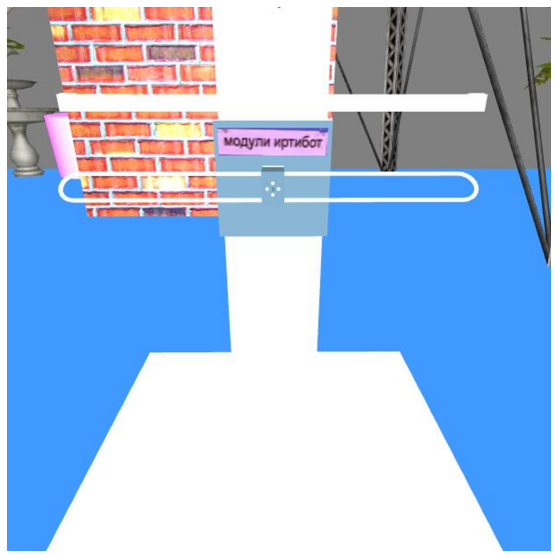

In [ ]:
imShow(path)

In [ ]:
class Mish(tf.keras.layers.Layer):
  def __init__(self,name=None,trainable=None,dtype=None):
    super(Mish,self).__init__(name=None,trainable=None,dtype=None)
  
  def call(self,inputs):
    return tf.math.multiply(inputs,tf.math.tanh(tf.math.log(1+tf.math.exp(inputs))))

In [ ]:
custom={'Mish':Mish}

In [ ]:
model=tf.keras.models.load_model('model_data/yolov4_box.h5',custom_objects=custom)

In [ ]:
model.summary()

In [ ]:
import torch

In [ ]:
import torch
img=cv2.imread(path,1)
print(img.shape)
img=cv2.resize(img,(512,512))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=img/255.0
img=np.array(tf.keras.backend.expand_dims(img,axis=0))
img=np.rollaxis(img,3,1)
x=torch.from_numpy(img)
print(img.shape,x.shape)

(608, 608, 3)
(1, 3, 512, 512) torch.Size([1, 3, 512, 512])


In [ ]:
# [out1,out2,out3]=model.predict(img)
out=model.predict(img)

In [ ]:
out1=np.reshape(out1,(1,64,64,3,6))
out2=np.reshape(out2,(1,32,32,3,6))
out3=np.reshape(out3,(1,16,16,3,6))

In [ ]:
print(out1.shape,out2.shape,out3.shape)

(1, 64, 64, 3, 6) (1, 32, 32, 3, 6) (1, 16, 16, 3, 6)


In [ ]:
scores1=out1[:,:,:,:]

In [ ]:
import time
tic=time.time()
for i in range(100):
  model.predict(img)
toc=time.time()
print((toc-tic)/100)

0.07141890287399293


In [ ]:
def yolo_head(feats, anchors, num_classes, input_shape, calc_loss=False):
    """Convert final layer features to bounding box parameters."""
    num_anchors = len(anchors)
    # Reshape to batch, height, width, num_anchors, box_params.
    anchors_tensor = K.reshape(K.constant(anchors), [1, 1, 1, num_anchors, 2])

    grid_shape = K.shape(feats)[1:3] # height, width
    grid_y = K.tile(K.reshape(K.arange(0, stop=grid_shape[0]), [-1, 1, 1, 1]),
        [1, grid_shape[1], 1, 1])
    grid_x = K.tile(K.reshape(K.arange(0, stop=grid_shape[1]), [1, -1, 1, 1]),
        [grid_shape[0], 1, 1, 1])
    grid = K.concatenate([grid_x, grid_y])
    grid = K.cast(grid, feats.dtype)

    feats = K.reshape(
        feats, [-1, grid_shape[0], grid_shape[1], num_anchors, num_classes + 5])

    # Adjust preditions to each spatial grid point and anchor size.
    box_xy = (K.sigmoid(feats[..., :2]) + grid) / K.cast(grid_shape[::-1], K.dtype(feats))
    box_wh = K.exp(feats[..., 2:4]) * anchors_tensor / K.cast(input_shape[::-1], K.dtype(feats))
    box_confidence = K.sigmoid(feats[..., 4:5])
    box_class_probs = K.sigmoid(feats[..., 5:])

    if calc_loss == True:
        return grid, feats, box_xy, box_wh
    return box_xy, box_wh, box_confidence, box_class_probs


def yolo_correct_boxes(box_xy, box_wh, input_shape, image_shape):
    '''Get corrected boxes'''
    box_yx = box_xy[..., ::-1]
    box_hw = box_wh[..., ::-1]
    input_shape = K.cast(input_shape, K.dtype(box_yx))
    image_shape = K.cast(image_shape, K.dtype(box_yx))
    new_shape = K.round(image_shape * K.min(input_shape/image_shape))
    offset = (input_shape-new_shape)/2./input_shape
    scale = input_shape/new_shape
    box_yx = (box_yx - offset) * scale
    box_hw *= scale

    box_mins = box_yx - (box_hw / 2.)
    box_maxes = box_yx + (box_hw / 2.)
    boxes =  K.concatenate([
        box_mins[..., 0:1],  # y_min
        box_mins[..., 1:2],  # x_min
        box_maxes[..., 0:1],  # y_max
        box_maxes[..., 1:2]  # x_max
    ])

    # Scale boxes back to original image shape.
    #boxes *= K.concatenate([image_shape, image_shape])
    boxes *= image_shape
    #print(boxes)
    return boxes


def yolo_boxes_and_scores(feats, anchors, num_classes, input_shape, image_shape):
    '''Process Conv layer output'''
    box_xy, box_wh, box_confidence, box_class_probs = yolo_head(feats,
        anchors, num_classes, input_shape)
    boxes = yolo_correct_boxes(box_xy, box_wh, input_shape, image_shape)
    boxes = K.reshape(boxes, [-1, 4])
    box_scores = box_confidence * box_class_probs
    box_scores = K.reshape(box_scores, [-1, num_classes])
    print(boxes,box_scores,max(box_scores))
    return boxes, box_scores


def yolo_eval(yolo_outputs,
              anchors,
              num_classes,
              image_shape,
              max_boxes=20,
              score_threshold=.6,
              iou_threshold=.5):
    """Evaluate YOLO model on given input and return filtered boxes."""
    num_layers = len(yolo_outputs)
    anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [1,2,3]] # default setting
    input_shape = K.shape(yolo_outputs[0])[1:3] * 32
    boxes = []
    box_scores = []
    for l in range(num_layers):
        _boxes, _box_scores = yolo_boxes_and_scores(yolo_outputs[l],
            anchors[anchor_mask[l]], num_classes, input_shape, image_shape)
        boxes.append(_boxes)
        box_scores.append(_box_scores)
    boxes = K.concatenate(boxes, axis=0)
    box_scores = K.concatenate(box_scores, axis=0)

    mask = box_scores >= score_threshold
    max_boxes_tensor = K.constant(max_boxes, dtype='int32')
    boxes_ = []
    scores_ = []
    classes_ = []
    for c in range(num_classes):
        # TODO: use keras backend instead of tf.
        class_boxes = tf.boolean_mask(boxes, mask[:, c])
        class_box_scores = tf.boolean_mask(box_scores[:, c], mask[:, c])
        nms_index = tf.image.non_max_suppression(
            class_boxes, class_box_scores, max_boxes_tensor, iou_threshold=iou_threshold)
        class_boxes = K.gather(class_boxes, nms_index)
        class_box_scores = K.gather(class_box_scores, nms_index)
        classes = K.ones_like(class_box_scores, 'int32') * c
        boxes_.append(class_boxes)
        scores_.append(class_box_scores)
        classes_.append(classes)
    boxes_ = K.concatenate(boxes_, axis=0)
    scores_ = K.concatenate(scores_, axis=0)
    classes_ = K.concatenate(classes_, axis=0)

    return boxes_, scores_, classes_

In [ ]:
anchors=[[12, 16], [19, 36], [40, 28], [36, 75], [76, 55], [72, 146], [142, 110], [192, 243], [459, 401]]
anchors=np.array(anchors)

In [ ]:
# anchors=[12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401]

In [ ]:
boxes,scores,classes=yolo_eval(out,
                               anchors,
                               1,
                               512,
                               20,
                               0.25,
                               0.5)

In [ ]:
print(boxes.shape,scores.shape,classes.shape)

(0, 4) (0,) (0,)


# Pytorch

In [ ]:
!git clone https://github.com/Tianxiaomo/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 914, done.
remote: Total 914 (delta 0), reused 0 (delta 0), pack-reused 914
Receiving objects: 100% (914/914), 2.34 MiB | 10.95 MiB/s, done.
Resolving deltas: 100% (557/557), done.


In [ ]:
del Darknet

In [ ]:
#del Darknet
%cd pytorch-YOLOv4/
from tool.darknet2pytorch import Darknet
%cd ../

/content/drive/My Drive/yolov3/darknet/pytorch-YOLOv4
/content/drive/My Drive/yolov3/darknet


In [ ]:
%cd ../
!ls

In [ ]:
model=Darknet('cfg/yolov4_box.cfg',inference=True)

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear


In [ ]:
model.load_weights('backup/yolov4_box_4000.weights')

In [ ]:
model.print_network()

In [ ]:
model.temp()

ok


In [ ]:
x=torch.FloatTensor(img)

In [ ]:
res=model(x)

good
good
good


In [ ]:
print(res[1].shape)

torch.Size([1, 16128, 1])


In [ ]:
print(res[0].shape)

torch.Size([1, 18, 64, 64])


In [ ]:
%cd pytorch-YOLOv4/
from demo import *
%cd ../

/content/drive/My Drive/yolov3/darknet/pytorch-YOLOv4
/content/drive/My Drive/yolov3/darknet


In [ ]:
detect_cv2(model,path)

good
good
good
-----------------------------------
           Preprocess : 0.014540
      Model Inference : 0.137737
-----------------------------------
-----------------------------------
       max and argmax : 0.001069
                  nms : 0.005442
Post processing total : 0.006511
-----------------------------------
good
good
good
-----------------------------------
           Preprocess : 0.002089
      Model Inference : 0.029443
-----------------------------------
-----------------------------------
       max and argmax : 0.000749
                  nms : 0.000187
Post processing total : 0.000937
-----------------------------------
data/obj/default_default_front_cam(1)-0249.jpg: Predicted in 0.035039 seconds.
box: 0.997329
save plot results to predictions.jpg


In [ ]:
!ls pytorch-YOLOv4/ |grep predictions.jpg

In [ ]:
imShow('pytorch-YOLOv4/predictions.jpg')

AttributeError: ignored

In [ ]:
model.cuda()

In [ ]:
def my_detect(m,cv_img):
  model.cuda()
  use_cuda=True
  img=cv2.resize(cv_img, (m.width, m.height))
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  boxes = do_detect(m, img, 0.4, 0.6, use_cuda)
  return boxes


In [ ]:
img=cv2.imread(path)

In [ ]:
tic=time.time()
boxes=my_detect(model,img)
toc=time.time()
print(toc-tic)

good
good
good
-----------------------------------
           Preprocess : 0.002076
      Model Inference : 0.031222
-----------------------------------
-----------------------------------
       max and argmax : 0.000702
                  nms : 0.000273
Post processing total : 0.000975
-----------------------------------
0.046401262283325195


In [ ]:
print(boxes)

[[[0.37546304, 0.2081239, 0.602033, 0.42540705, 0.99732876, 0.99732876, 0]]]


# Final

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import random
import os

drive.mount('/content/drive')
%cd '/content/drive/My Drive/yolov3/darknet'

Mounted at /content/drive
/content/drive/My Drive/yolov3/darknet


In [ ]:
#del Darknet
%cd pytorch-YOLOv4/
from tool.darknet2pytorch import Darknet
from demo import *
%cd ../

/content/drive/My Drive/yolov3/darknet/pytorch-YOLOv4
/content/drive/My Drive/yolov3/darknet


In [ ]:
board=Darknet('cfg/yolov4_box.cfg',inference=True)
board.load_weights('backup/yolov4_box_4000.weights')
board.cuda()

In [ ]:
module=Darknet('cfg/yolov4_module.cfg',inference=True)
module.load_weights('backup/yolov4_module_4000.weights')
module.cuda()

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear


Darknet(
  (models): ModuleList(
    (0): Sequential(
      (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (mish1): Mish()
    )
    (1): Sequential(
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (mish2): Mish()
    )
    (2): Sequential(
      (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (mish3): Mish()
    )
    (3): EmptyModule()
    (4): Sequential(
      (conv4): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (mish4): Mish()
    )
    (5): Sequential(
      (conv5): C

In [ ]:
def my_detect(m,cv_img):
  use_cuda=True
  img=cv2.resize(cv_img, (m.width, m.height))
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  boxes = do_detect(m, img, 0.4, 0.6, use_cuda)
  # if len(boxes[0])==0:
  #   return [False,0,0,0,0]
  box=boxes[0][0]
  h,w,c=cv_img.shape
  x1 = int(box[0] * w)
  y1 = int(box[1] * h)
  x2 = int(box[2] * w)
  y2 = int(box[3] * h)
  return [True,x1,y1,x2,y2]
  

In [ ]:
def end_to_end(board,module,cv_img):
  use_cuda=True
  img=cv2.resize(cv_img, (board.width, board.height))
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  boxes = do_detect(board, img, 0.4, 0.6, use_cuda)
  box=boxes[0][0]
  h,w,c=cv_img.shape
  x1 = int(box[0] * w)
  y1 = int(box[1] * h)
  x2 = int(box[2] * w)
  y2 = int(box[3] * h)
  
  hc=y2-y1
  wc=x2-x1

  cropped=cv2.resize(cv_img[y1:y2,x1:x2], (module.width,module.height))
  imShow(cropped)
  cropped=cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
  boxes=do_detect(module, cropped, 0.4, 0.6, use_cuda)
  box=boxes[0][0]
  print(box,hc,wc,x1,y1)
  a1=x1+int(box[0]*wc)
  b1=y1+int(box[1]*hc)
  a2=x1+int(box[2]*wc)
  b2=y1+int(box[3]*hc)
  print(a1,b1,a2,b2)
  return [a1,b1,a2,b2]

In [ ]:
path='data/obj/default_default_front_cam(1)-0249.jpg'

In [ ]:
!ls data/obj_module | grep inspection

inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0001.jpg
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0001.txt
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0002 (1).txt
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0002.jpg
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0002.txt
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0003.jpg
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0003.txt
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0004.jpg
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0004.txt
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0005.jpg
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0005.txt
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0006.jpg
inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0006.txt
inspection_world_quadrotor_base_link_front_cam_

In [ ]:
path='data/obj_module/inspection_world_quadrotor_base_link_front_cam_camera_sensor(1)-0023.jpg'

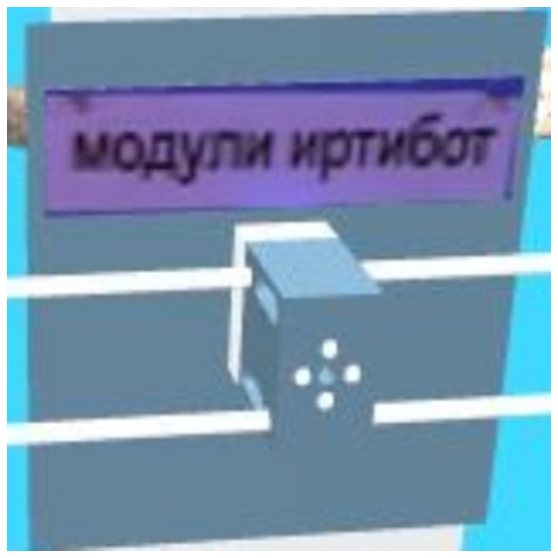

In [ ]:
img=cv2.imread(path)
imShow(img)

In [ ]:
ret,x1,y1,x2,y2=my_detect(module,img)

-----------------------------------
           Preprocess : 0.001226
      Model Inference : 0.044350
-----------------------------------
-----------------------------------
       max and argmax : 0.001383
                  nms : 0.000063
Post processing total : 0.001446
-----------------------------------


IndexError: ignored

In [ ]:
print(ret,x1,y1,x2,y2)

True 156 170 220 264


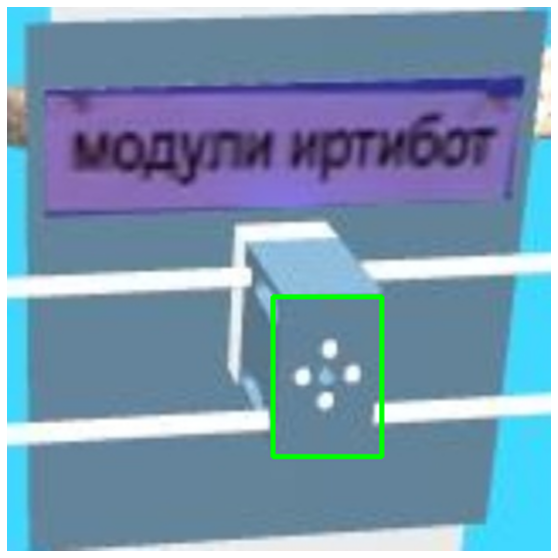

In [ ]:
res=img.copy()
res=cv2.rectangle(res,(x1,y1),(x2,y2),(0,255,0),5)
imShow(res)

-----------------------------------
           Preprocess : 0.003318
      Model Inference : 0.044542
-----------------------------------
-----------------------------------
       max and argmax : 0.000879
                  nms : 0.000703
Post processing total : 0.001582
-----------------------------------


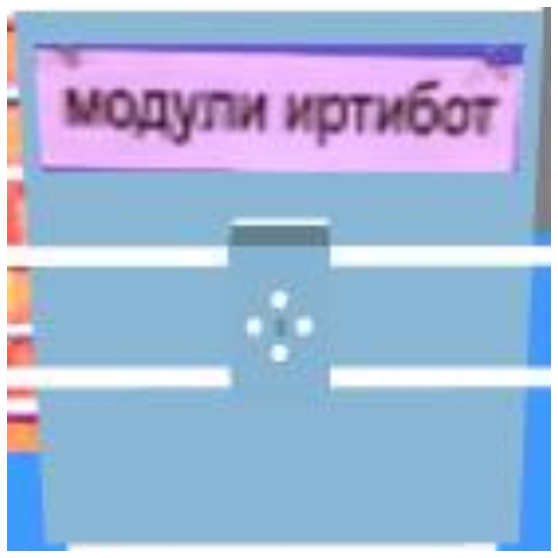

-----------------------------------
           Preprocess : 0.001189
      Model Inference : 0.057299
-----------------------------------
-----------------------------------
       max and argmax : 0.001253
                  nms : 0.000204
Post processing total : 0.001457
-----------------------------------
[0.3599835, 0.18231004, 0.6693487, 0.4909771, 0.44230756, 0.44230756, 0] 132 138 228 126
277 150 320 190
0.41698241233825684


In [ ]:
tic=time.time()
x1,y1,x2,y2=end_to_end(board,module,img)
toc=time.time()
print(toc-tic)

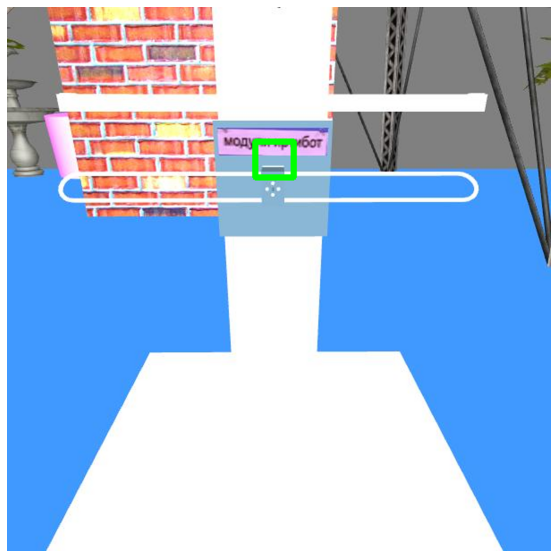

In [ ]:
res=img.copy()
res=cv2.rectangle(res,(x1,y1),(x2,y2),(0,255,0),5)
imShow(res)

In [ ]:
print(my_detect(module,cropped))

NameError: ignored